In [167]:
# 必要なライブラリの読み込み
import pandas as pd
import numpy as np
from malss import MALSS

# おまじない群
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

# 日本語フォントの設定
from matplotlib.font_manager import FontProperties
font_path = '/Windows/Fonts/Ricty Diminished.ttf'  #DLしたフォントのパスを指定
font_prop = FontProperties(fname=font_path)

In [486]:
df = pd.read_csv("train.tsv", delimiter='\t' )
df_p =  pd.read_csv("test.tsv", delimiter='\t' )

In [487]:
df.head(10)
df.shape

(199, 10)

In [488]:
df_p.head(10)
df_p.shape

(199, 9)

In [489]:
# 元のDataFrameそのままに加工用にdf2を用意
df2 = df
df2_p = df_p

In [490]:
# スペースで区切った1つ目のブロック＝カーブランドという前提でデータを書き換え
df2["car name"] = df["car name"].str.split(" ").str[0]
df2_p["car name"] = df_p["car name"].str.split(" ").str[0]

In [491]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
id              199 non-null int64
mpg             199 non-null float64
cylinders       199 non-null int64
displacement    199 non-null float64
horsepower      199 non-null object
weight          199 non-null float64
acceleration    199 non-null float64
model year      199 non-null int64
origin          199 non-null int64
car name        199 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 15.6+ KB


In [492]:
# car nameカラムの概要を把握⇒置換が必要だと判定
# ascending=False：降順
df2["car name"].value_counts(ascending=True)
df2_p["car name"].value_counts(ascending=True)

nissan         1
opel           1
mercedes       1
chevy          1
subaru         2
cadillac       2
renault        2
saab           2
maxda          2
vw             2
volvo          4
fiat           4
audi           5
mercury        5
volkswagen     5
oldsmobile     6
chrysler       6
peugeot        6
mazda          7
honda          7
buick          9
datsun         9
dodge         10
pontiac       11
toyota        12
amc           12
chevrolet     16
plymouth      18
ford          31
Name: car name, dtype: int64

In [493]:
# ノイズデータを置換1
df2["car name"] = df2["car name"].replace({
    "vw":"volkswagen",
    "vokswagen":"volkswagen",
    "toyouta":"toyota",
    "chevy":"chevrolet",
    "mercedes-benz":"mercedes",
    "chevroelt":"chevrolet",
    "capri":"ford"})

df2_p["car name"] = df2_p["car name"].replace({
    "vw":"volkswagen",
    "vokswagen":"volkswagen",
    "toyouta":"toyota",
    "maxda":"mazda",
    "chevy":"chevrolet",
    "chevroelt":"chevrolet",
    "capri":"ford"})

In [494]:
# 省略ネーム置換用
df2["car name"].value_counts(ascending=True)

hi             1
triumph        1
audi           2
subaru         2
saab           2
peugeot        2
volvo          2
mercedes       2
bmw            2
opel           3
renault        3
mazda          3
fiat           4
oldsmobile     4
pontiac        5
honda          6
mercury        6
buick          8
plymouth      13
toyota        14
datsun        14
volkswagen    15
amc           16
dodge         18
ford          21
chevrolet     30
Name: car name, dtype: int64

In [495]:
# nissan/cadillac/chrysler（計9件）はtrain側にない・・・
# ⇒drop raw,drop columnそれぞれで比較すべきか。。
df2_p["car name"].value_counts(ascending=True)

nissan         1
opel           1
mercedes       1
subaru         2
cadillac       2
renault        2
saab           2
volvo          4
fiat           4
audi           5
mercury        5
peugeot        6
oldsmobile     6
chrysler       6
volkswagen     7
honda          7
buick          9
datsun         9
mazda          9
dodge         10
pontiac       11
toyota        12
amc           12
chevrolet     17
plymouth      18
ford          31
Name: car name, dtype: int64

In [496]:
df2 = df2.drop("car name", axis=1)
df2_p = df2_p.drop("car name", axis=1)

In [497]:
df2["horsepower"] = df2["horsepower"].replace("?","100.0")
df2_p["horsepower"] = df2_p["horsepower"].replace("?","100.0")

In [498]:
df2["horsepower"] = df2["horsepower"].str.extract('([0-9]+)').astype(float)
df2_p["horsepower"] = df2_p["horsepower"].str.extract('([0-9]+)').astype(float)

In [499]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
id              199 non-null int64
mpg             199 non-null float64
cylinders       199 non-null int64
displacement    199 non-null float64
horsepower      199 non-null float64
weight          199 non-null float64
acceleration    199 non-null float64
model year      199 non-null int64
origin          199 non-null int64
dtypes: float64(5), int64(4)
memory usage: 14.1 KB


In [500]:
# データの概要を眺める
df2.describe()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,101.271357,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,35.201681,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,75.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,92.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,112.500000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,220.000000,5140.000000,23.700000,82.000000,3.000000


In [425]:
# 色々なデータ処理（1）

# idが350より大きいもののみ抽出
df[df2['id']>350]

# car nameカラムのレコードをユニーク化
df2['car name'].unique()

# 複数条件でデータ抽出1：1,2,4行目の、2,3,4,5列目レコードを取得
df2.iloc[[1,2,4],[2,3,4,5]]

# 複数条件でデータ抽出2：クエリ的にレコードを絞り込む
# andを大文字で記述したらエラーが出た
df2[['id','cylinders']].query('id > 350 | cylinders > 4')

,id,cylinders
2,9,6
6,18,6
7,19,8
9,24,8
10,25,6
13,32,8
14,35,6
19,41,6
21,43,8
23,47,8


In [501]:
# 破壊的変更をしていくのでDataFrameお引越し
df3 = df2
df3_p = df2_p

In [502]:
train_y = df2['mpg']
train_X = df2.drop(['mpg'],axis=1)
test_X = df2_p

In [503]:
train_y.head(5)
train_y.shape
train_y.describe()

count    199.000000
mean      24.307035
std        7.797665
min        9.000000
25%       18.000000
50%       24.000000
75%       30.500000
max       44.600000
Name: mpg, dtype: float64

In [504]:
train_X.head(5)
train_X.shape
train_X.describe()
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
id              199 non-null int64
cylinders       199 non-null int64
displacement    199 non-null float64
horsepower      199 non-null float64
weight          199 non-null float64
acceleration    199 non-null float64
model year      199 non-null int64
origin          199 non-null int64
dtypes: float64(4), int64(4)
memory usage: 12.5 KB


In [505]:
test_X.shape
test_X.describe()
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
id              199 non-null int64
cylinders       199 non-null int64
displacement    199 non-null float64
horsepower      199 non-null float64
weight          199 non-null float64
acceleration    199 non-null float64
model year      199 non-null int64
origin          199 non-null int64
dtypes: float64(4), int64(4)
memory usage: 12.5 KB


In [506]:
clf = MALSS('regression',
            shuffle=True, standardize=True, n_jobs=1,
            random_state=0, lang='jp', verbose=True)

In [507]:
cls.fit(train_X, train_y, 'result_regression')

Set data.
Analyze. (take some time)
    Support Vector Machine (RBF Kernel)


C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\malss\data.py:134: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return pd.DataFrame(self._standardizer.transform(X),
C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    Random Forest


C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    Ridge Regression
    Decision Tree
Make report.


C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    Support Vector Machine (RBF Kernel)
    Random Forest
    Ridge Regression
    Decision Tree
Done.


In [508]:
test_y = cls.predict(test_X)

C:\WinPy\WPy-3710b1\python-3.7.1rc1.amd64\lib\site-packages\malss\data.py:134: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return pd.DataFrame(self._standardizer.transform(X),


In [511]:
import csv

# ファイルオープン
f = open('output.csv', 'w')
writer = csv.writer(f, lineterminator='\n')
# データをリストに保持
csvlist = test_y
# 出力
writer.writerow(csvlist)
f.close()

TypeError: writerow() takes no keyword arguments

In [519]:
result_y = pd.DataFrame(test_X["id"]) + pd.DataFrame(test_y)

In [520]:
result_y

,id,0
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [513]:
pd.DataFrame(test_y).to_csv("result_prediction.csv", index=True)

In [189]:
test_X.to_csv("output.csv", index=False)
train_X.to_csv("input.csv", index=False)

In [ ]:
# アップロードの形式に合わせて出力
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(['PassengerId','Survived'])
    for pid, survived in zip(test_data[:,0].astype(int), testX.astype(int)):
        writer.writerow([pid, survived])

In [144]:
# -----分布把握のための作業用DF------
# ---------------------------------------
# 色々なデータ処理（2）

# bin処理
# bins：刻み幅、precision：小数点以下表示桁数、right：上限を含むか否か
# labels：ラベル（リストデータ）/Falseなら「順序」になる
df3['mpg_bins'] = pd.cut(df3['mpg'], bins=10, precision=0, right=True, labels=False)
df3['weight_bins'] = pd.cut(df3['weight'], bins=10, precision=0, right=True, labels=False)
df3['displacement_bins'] = pd.cut(df3['displacement'], bins=10, precision=0, right=True, labels=False)
df3['acceleration_bins'] = pd.cut(df3['acceleration'], bins=10, precision=0, right=True, labels=False)
df3['model_year_bins'] = pd.cut(df3['model year'], bins=10, precision=0, right=True, labels=False)
df3.head(10)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_bins,weight_bins,displacement_bins,acceleration_bins,model_year_bins
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge,5,2,1,4,9
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,volkswagen,6,0,0,3,7
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota,2,3,2,4,4
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge,5,1,0,3,3
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota,8,1,0,5,9
5,16,27.0,4,151.0,90.00,2735.0,18.0,82,1,pontiac,5,3,2,6,9
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevrolet,1,6,4,6,4
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile,0,5,7,1,2
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw,4,1,1,2,0
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge,2,6,6,4,7


In [145]:
df3['model_year_bins'].value_counts(sort=False)

0    32
1    13
2    15
3    14
4    28
5    14
6    17
7    14
8    19
9    33
Name: model_year_bins, dtype: int64

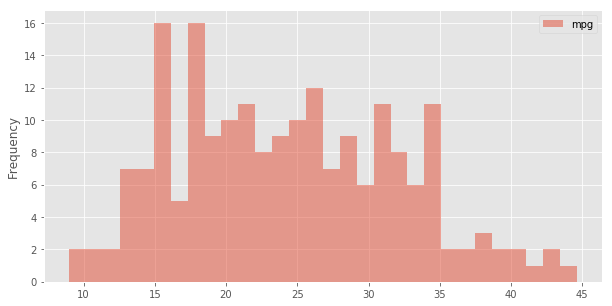

In [146]:
# plotを試してみる
# ▲matplotlib（plt）使ってないな？
# ⇒これpandasのほうのplotだ、、

df3.plot.hist(
    y='mpg',
    bins=30,
    figsize=(10,5),
    alpha=0.5
)

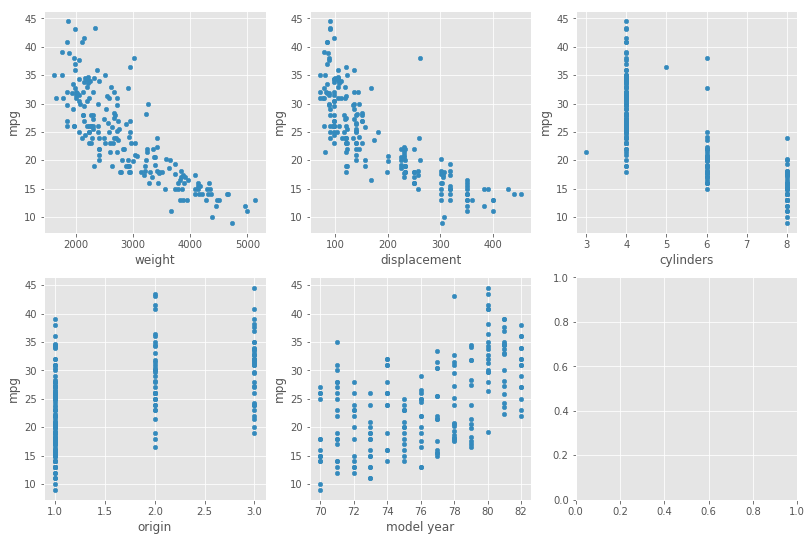

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13.5, 9))

df3.plot(
    kind='scatter',
    x='weight',
    y='mpg',
    ax=axes[0, 0]
)
df3.plot(
    kind='scatter',
    x='displacement',
    y='mpg',
    ax=axes[0, 1]
)
df3.plot(
    kind='scatter',
    x='cylinders',
    y='mpg',
    ax=axes[0, 2]
)
df3.plot(
    kind='scatter',
    x='origin',
    y='mpg',
    ax=axes[1, 0]
)
df3.plot(
    kind='scatter',
    x='model year',
    y='mpg',
    ax=axes[1, 1]
)

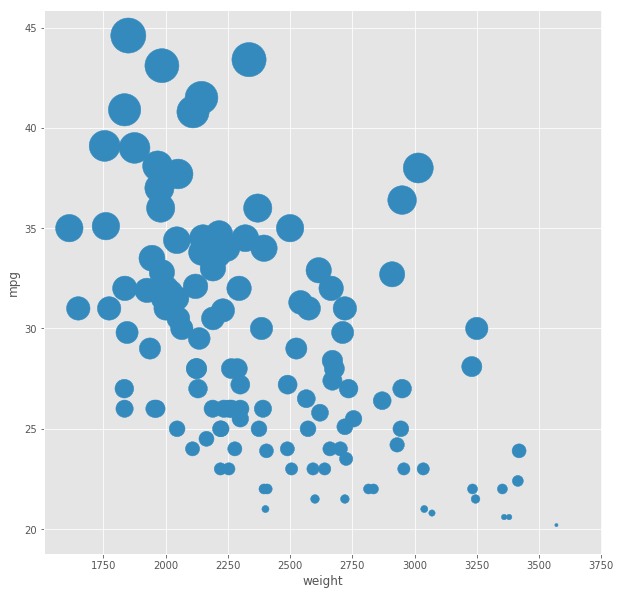

In [148]:
df3.plot(
    kind='scatter',
    x='weight',
    y='mpg',
    #c = 'mpg',
    s=(df['mpg']-20)*50,
    figsize=(10, 10)
)

In [149]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
id                   199 non-null int64
mpg                  199 non-null float64
cylinders            199 non-null int64
displacement         199 non-null float64
horsepower           199 non-null object
weight               199 non-null float64
acceleration         199 non-null float64
model year           199 non-null int64
origin               199 non-null int64
car name             199 non-null object
mpg_bins             199 non-null int64
weight_bins          199 non-null int64
displacement_bins    199 non-null int64
acceleration_bins    199 non-null int64
model_year_bins      199 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 23.4+ KB


In [150]:
df3.plot(
    kind='scatter',
    x='horsepower',
    y='weight',
    #c = 'mpg',
    s=(df['mpg']-20)*50,
    figsize=(10, 10)
)

ValueError: scatter requires x column to be numeric

In [130]:
df3

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,0,2525.0,16.0,82,1,dodge
1,3,31.9,4,89.0,0,1925.0,14.0,79,2,volkswagen
2,9,19.0,6,156.0,0,2930.0,15.5,76,3,toyota
3,11,28.0,4,90.0,0,2125.0,14.5,74,1,dodge
4,13,37.7,4,89.0,0,2050.0,17.3,81,3,toyota
5,16,27.0,4,151.0,0,2735.0,18.0,82,1,pontiac
6,18,16.0,6,250.0,0,3897.0,18.5,75,1,chevrolet
7,19,11.0,8,350.0,0,3664.0,11.0,73,1,oldsmobile
8,23,26.0,4,121.0,0,2234.0,12.5,70,2,bmw
9,24,18.2,8,318.0,0,3830.0,15.2,79,1,dodge


In [ ]:
df4 = df3.iloc[:,1:8]

In [ ]:
pd.plotting.scatter_matrix(df4, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60,alpha=.8)